### Réalisé par :
* KENAI Imad Eddine 191932017671 G3
* BENKOUITEN Aymen  191931046409 G3


- [Descente du Gradient](#Descente_du_Gradient)
- [Régression linéaire à plusieurs variables](#Régression_linéaire_à_plusieurs_variables)
 - [Descente du Gradient](#Gradient_Descent_multi)
- [Renforcement d'apprentissage](#Renforcement_apprentissage)

# TP 2 Descente du Gradient
Dans ce TP, nous aimerions prédire le bénéfice d'une entreprise dans plusieurs ville en nous basant sur les habitant de cette ville.

Pour ce faire, nous étudierons un ensemble de données avec le bénéfice (y) et les caractéristiques des habitants (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import copy


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [2]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=int)
data.shape

(97, 2)

Dans ces données (data), la première colonne represente la première caractéristique (la population d'une ville x1000), la deuxieme colonne represente le bénéfice (x1000).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [3]:
# rajoutons l'ordonnée à l'origine theta 0
#intercept=np.ones((data.shape[0],1))
#X=np.column_stack((intercept,data[:,0]))
y = data[:,1]
X = data[:,0]

In [4]:
X.shape

(97,)

In [5]:
X[:10]

array([6, 5, 8, 7, 5, 8, 7, 8, 6, 5])

In [6]:
y.shape

(97,)

In [7]:
y

array([17,  9, 13, 11,  6, 11,  4, 12,  6,  3,  3, 15,  3,  7,  0,  3,  5,
        0,  3,  5,  3, 21,  4,  5,  3, 22, 13,  7, 14, 24, -1,  5, 12,  1,
        6,  4,  4,  3, 10,  5,  0,  3,  5,  2,  6,  1,  5,  1,  8,  1,  6,
        1,  4,  4,  1, -1,  2,  4,  3,  5,  5,  0, 17, 12, 17,  4,  5,  7,
        1, 20,  6,  4,  1,  3, -2,  0,  3,  5,  6,  2,  0,  0,  0,  7,  5,
        4,  6,  0,  0,  2,  1,  4,  7,  1,  0,  9,  0])

[]

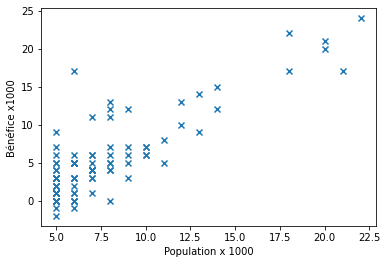

In [8]:
# traçons ces données pour visualisation
plt.scatter(X,y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Bénéfice x1000')
plt.plot()

<a name="Descente_du_Gradient"></a>
# Descente du Gradient : Préparation des fonctions

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [9]:
#je prefere utilisée le theta_0 separement
def compute_cost(x, y, theta, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_theta_b = theta * x[i] + b
        cost = cost + (f_theta_b - y[i])**2
      
    total_cost = 1 / (2 * m) * cost

    return total_cost
    
    

In [10]:
def compute_cost_dot(x, y, theta, b):
   
    m = x.shape[0] 

    f_theta_b = np.dot(x,theta) + b 

    total_cost = (1 / (2 * m)) * np.sum(np.subtract(f_theta_b , y)**2)

    return total_cost
    

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

<a name="toc_40291_2.3"></a>
### calculer_gradient
<a name='ex-01'></a>
`calculer_gradient`   calcule et retourne le gradient   $\frac{\partial J(\theta,b)}{\partial \theta}$,$\frac{\partial J(\theta,b)}{\partial b}$. 

In [10]:

def calculer_gradient(x, y, theta, b): 
    
    
    # Number of training examples
    m = x.shape[0]    
    dj_dtheta = 0
    dj_db = 0
    
    for i in range(m):  
        
        f_theta_b = theta * x[i] + b #f(theta,b) 
        
        dj_dtheta_i = (f_theta_b - y[i]) * x[i] 
        
        dj_db_i = f_theta_b - y[i] 
        
        
        dj_db += dj_db_i          #sum
        dj_dtheta += dj_dtheta_i  #sum
        
    dj_dtheta = dj_dtheta / m 
    dj_db = dj_db / m 
        
    return dj_dtheta, dj_db

In [11]:

# garder aussi le cout à chaque itération 
# pour afficher le coût en fonction de theta0 et theta1
def gradient_descent(x, y, theta_in, b_in, alpha, num_iters): 
    
    
    cost_history = []
    param_history = []
    b = b_in
    theta = theta_in
    
    for i in range(num_iters):
       
        #calculer le gradient
        dj_dtheta, dj_db = calculer_gradient(x, y, theta , b)     

        #mise a jour des parametres
        b = b - alpha * dj_db                            
        theta = theta - alpha * dj_dtheta                            

        #sauvgarder l'historique du Cout et des parametres    
        cost_history.append( compute_cost(x, y, theta , b))
        param_history.append([theta,b])
        
        # afficher le cout et les parametres
        if i% math.ceil(num_iters/10) == 0:
                  print(f"Iteration {i}: Cost {cost_history[-1]:.2e} ",end='   ')
                  print(f"dj_dtheta: {dj_dtheta:.3e}, dj_db: {dj_db:.2e} ",end='   ')
                  print(f"theta: {theta:.3e}, b:{b:.5e}")
 
    return theta, b, cost_history, param_history 
    

# Descente du Gradient : Appel des fonctions

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

Initialisation de $\theta_0$ et $\theta_1$

In [12]:
theta = 0
b = 0

Calculer le cout initial

Appel des la fonction de calcul du gradient

In [13]:
# paramètres
iterations = 2000;
alpha = 0.01;
# Appel
theta , b , costh , paramh = gradient_descent(X, y, theta , b, alpha, iterations);

Iteration 0: Cost 7.22e+00    dj_dtheta: -5.914e+01, dj_db: -5.40e+00    theta: 5.914e-01, b:5.40206e-02
Iteration 200: Cost 4.95e+00    dj_dtheta: -5.351e-02, dj_db: 5.13e-01    theta: 9.186e-01, b:-1.17916e+00
Iteration 400: Cost 4.58e+00    dj_dtheta: -3.623e-02, dj_db: 3.47e-01    theta: 1.007e+00, b:-2.02810e+00
Iteration 600: Cost 4.41e+00    dj_dtheta: -2.454e-02, dj_db: 2.35e-01    theta: 1.067e+00, b:-2.60296e+00
Iteration 800: Cost 4.34e+00    dj_dtheta: -1.661e-02, dj_db: 1.59e-01    theta: 1.108e+00, b:-2.99224e+00
Iteration 1000: Cost 4.30e+00    dj_dtheta: -1.125e-02, dj_db: 1.08e-01    theta: 1.135e+00, b:-3.25584e+00
Iteration 1200: Cost 4.28e+00    dj_dtheta: -7.618e-03, dj_db: 7.31e-02    theta: 1.154e+00, b:-3.43435e+00
Iteration 1400: Cost 4.28e+00    dj_dtheta: -5.159e-03, dj_db: 4.95e-02    theta: 1.166e+00, b:-3.55522e+00
Iteration 1600: Cost 4.27e+00    dj_dtheta: -3.493e-03, dj_db: 3.35e-02    theta: 1.175e+00, b:-3.63707e+00
Iteration 1800: Cost 4.27e+00    dj

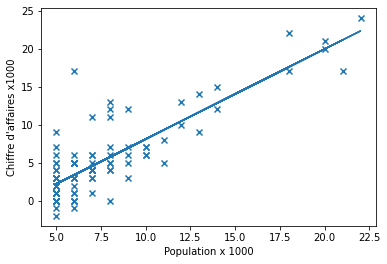

In [14]:
y_pred=np.multiply(X,theta)+b
plt.scatter(X,y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X,y_pred)
plt.show()
# la ligne du graphe represente le traçage de la fonction hypothèse
# la ligne devrait se rapprocher des données après entrainement avec la descente du gredient

- Traçage du coût en fonction de nombre d'iterations


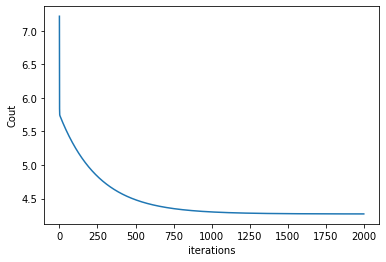

In [15]:


paramh=np.array(paramh)
costh=np.array(costh)

plt.plot(list(range(iterations)),costh)

plt.xlabel("iterations")
plt.ylabel("Cout")


plt.show()

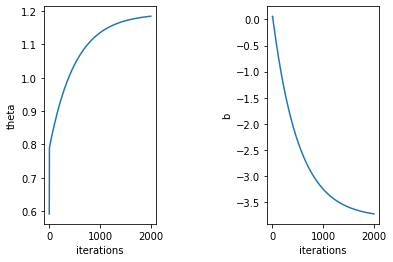

In [16]:
plt.subplots_adjust(wspace=1)
plt.subplot(1,2,1)

plt.plot(list(range(iterations)),paramh[:,0])

plt.xlabel("iterations")
plt.ylabel("theta")

plt.subplot(1,2,2)

plt.plot(list(range(iterations)),paramh[:,1])

plt.xlabel("iterations")
plt.ylabel("b")
plt.show()

- Traçage du coût en fonction de theta0 et theta1

In [45]:
%matplotlib notebook

<IPython.core.display.Javascript object>


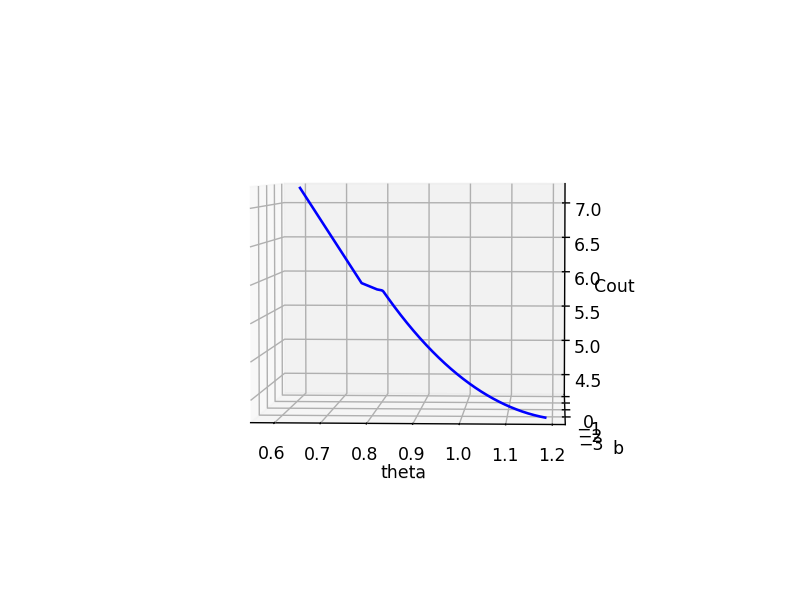

In [46]:
from mpl_toolkits import mplot3d
import mplcursors

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel("theta")
ax.set_ylabel("b")
ax.set_zlabel("Cout")
ax.plot3D(paramh[:,0], paramh[:,1], costh, 'blue')
#ax.view_init(elev=30, azim=45)
cursor = mplcursors.cursor(ax)
plt.show()




Prédire des valeurs de y

In [19]:
# Predire pour une opulation = 35,000 et 70,000
predict1 = 3.5 * theta + b
predict1

0.4163278228191025

In [20]:
predict2 = 7 * theta + b
predict2

4.562534345417498

<a name="Régression_linéaire_à_plusieurs_variables"></a>
# Régression linéaire à plusieurs variables

Proposer, l'aide des fonctions définies precedemment, une regression linéaire lorsque le nombre de descripeurs est supérieur à 1, en utilisant la base d'apprentissage suivante

In [21]:
# données
dataMulti = np.genfromtxt('dataMulti.csv', delimiter=',', dtype=int)
dataMulti.shape

(47, 3)

Pour cette ensemble de données, nous voudrions prédire le prix d'une maison (3ème colonne de dataMulti) à partir de :
- sa supérficie (1ère colonne)
- son nombre de chambres (2ème colonne)

In [22]:
dataMulti[:10]

array([[  2104,      3, 399900],
       [  1600,      3, 329900],
       [  2400,      3, 369000],
       [  1416,      2, 232000],
       [  3000,      4, 539900],
       [  1985,      4, 299900],
       [  1534,      3, 314900],
       [  1427,      3, 199000],
       [  1380,      3, 212000],
       [  1494,      3, 242500]])

In [23]:
# d'abord créer X et y

X_multi = dataMulti[:,:2]
y_multi = dataMulti[:,2] 

print(X_multi.shape)
print(y_multi.shape)



(47, 2)
(47,)


In [24]:
# redéfinissez vos fonctions de coût si cela est necessaire


#cette methode peut etre utilisee meme pour le regresion lineaire avec une seule variable
def compute_cost_multi(X, y, theta, b): 
   
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_theta_b_i = np.dot(X[i], theta) + b           #scalar
        
        cost = cost + (f_theta_b_i - y[i])**2       #scalar
        
    cost = cost / (2 * m)                      #scalar    
    
    return cost

- ### Mise à l'échelle des données et Normalisation des données

Il existe differentes methodes la mise a l'echelle et la normalisation , on va utiliser la methode predefinie `StandardScaler` du **ScikitLearn** qui se base sur le **Z_Score**

In [25]:


from sklearn.preprocessing import StandardScaler
dataMulti_normalized =  StandardScaler().fit_transform(dataMulti) # NOrmalisation des donnees 

X_multi_N = dataMulti_normalized[:,:2]
y_multi_N = dataMulti_normalized[:,2] 


<a name="Gradient_Descent_multi"></a>
# 5 Gradient Descent  plusieurs Variables


$$\begin{align*} \text{repeter}& \; \lbrace \newline\;
& \theta_j = \theta_j -  \alpha \frac{\partial J(\mathbf{\theta},b)}{\partial \theta_j}   \; \newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{\theta},b)}{\partial b}  \newline \rbrace
\end{align*}$$



$$
\begin{align}
\frac{\partial J(\mathbf{\theta},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{\theta},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  \\
\frac{\partial J(\mathbf{\theta},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{\theta},b}(\mathbf{x}^{(i)}) - y^{(i)}) 
\end{align}
$$

    

In [29]:
def compute_gradient_multi(X, y, theta, b): 

    
    # m = nbr d'instances
    # n = nbr de caracteristiques
    m,n = X.shape           
    
    dj_dtheta = np.zeros((n,)) # initialisation du vecteur theta
    dj_db = 0.                 #initialisation du b
    
    for i in range(m):  
       
        f_theta_b = (np.dot(X[i], theta) + b) - y[i]   
        
        for j in range(n): 
            
            
            dj_dtheta[j] = dj_dtheta[j] + (f_theta_b * X[i, j] )   
        
        dj_db = dj_db + f_theta_b                        
    
    dj_dtheta = dj_dtheta / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dtheta

In [30]:
def gradient_descent_multi(X, y, theta_in, b_in, alpha, num_iters): 
    
    
    
    cost_history = []
    theta = copy.deepcopy(theta_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        
        #calculer le gradient
        dj_db,dj_dtheta = compute_gradient_multi(X, y, theta, b)   

        # mise a jour des parametres
        theta = theta - alpha * dj_dtheta               
        b = b - alpha * dj_db              
      
        
        cost_history.append( compute_cost_multi(X, y, theta, b))

        
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {cost_history[-1]:.5e}   ")
        
    return theta, b, cost_history 

### Comparer la descente du gradient avec et sans normalisation
- **avec normalisation**

In [31]:
# initialize parameters
initial_theta = np.array([0]*X_multi.shape[1])

initial_b = 0
# some gradient descent settings
iterations = 2000
alpha = 0.01

# run gradient descent 
theta_final, b_final, J_hist = gradient_descent_multi(X_multi_N, y_multi_N, initial_theta, initial_b,alpha, iterations)

print(f"b = {b_final: 0.2f}, theta = {theta_final}")


Iteration    0: Cost 4.90802e-01   
Iteration  200: Cost 1.50451e-01   
Iteration  400: Cost 1.36345e-01   
Iteration  600: Cost 1.34010e-01   
Iteration  800: Cost 1.33610e-01   
Iteration 1000: Cost 1.33542e-01   
Iteration 1200: Cost 1.33530e-01   
Iteration 1400: Cost 1.33528e-01   
Iteration 1600: Cost 1.33528e-01   
Iteration 1800: Cost 1.33528e-01   
b = -0.00, theta = [ 0.88469637 -0.0531089 ]


<IPython.core.display.Javascript object>


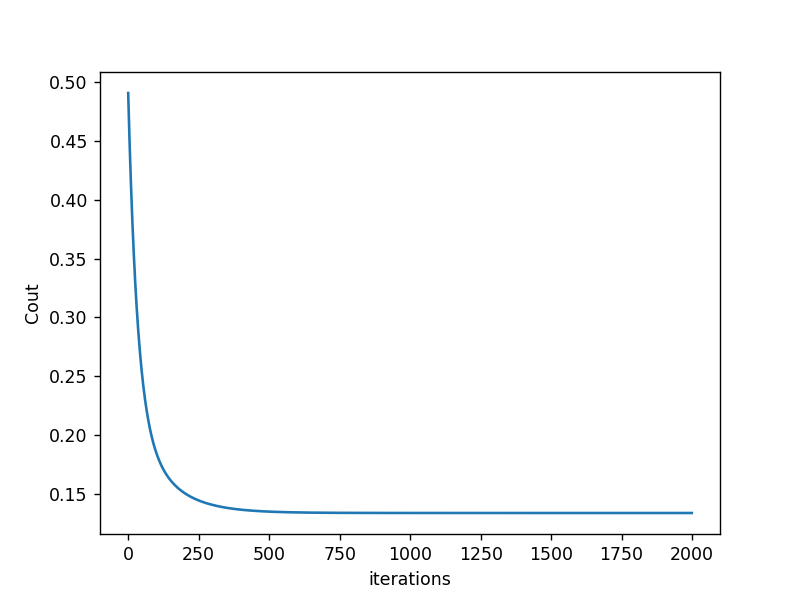

In [32]:

%matplotlib notebook

plt.plot(list(range(len(J_hist))),J_hist)


plt.ylabel('Cout')             
plt.xlabel('iterations')   
plt.show()

- **sans normalisation** $$\newline$$
on va avoir une erreur de overflow

In [33]:
# initialize parameters
initial_theta = np.array([0]*X_multi.shape[1])

initial_b = 0
# some gradient descent settings
iterations = 2000
alpha = 0.01

# run gradient descent 
theta_final, b_final, J_hist = gradient_descent_multi(X_multi, y_multi, initial_theta, initial_b,alpha, iterations)

print(f"b = {b_final: 0.2f}, theta = {theta_final}")

C:\Users\HP\AppData\Local\Temp/ipykernel_18764/3059624851.py:18: RuntimeWarning: overflow encountered in long_scalars
  dj_dtheta[j] = dj_dtheta[j] + (f_theta_b * X[i, j] )
C:\Users\HP\AppData\Local\Temp/ipykernel_18764/2457081919.py:12: RuntimeWarning: overflow encountered in double_scalars
  cost = cost + (f_theta_b_i - y[i])**2       #scalar
C:\Users\HP\AppData\Local\Temp/ipykernel_18764/3059624851.py:18: RuntimeWarning: overflow encountered in double_scalars
  dj_dtheta[j] = dj_dtheta[j] + (f_theta_b * X[i, j] )
C:\Users\HP\AppData\Local\Temp/ipykernel_18764/1103676276.py:15: RuntimeWarning: invalid value encountered in subtract
  theta = theta - alpha * dj_dtheta


Iteration    0: Cost 5.54840e+19   
Iteration  200: Cost nan   
Iteration  400: Cost nan   
Iteration  600: Cost nan   
Iteration  800: Cost nan   
Iteration 1000: Cost nan   
Iteration 1200: Cost nan   
Iteration 1400: Cost nan   
Iteration 1600: Cost nan   
Iteration 1800: Cost nan   
b =  nan, theta = [nan nan]


# Vérification de l'implementation
Comparer vos algorithmes à ceux de `scikitlearn`

In [35]:
#Creation d'une base de training et de test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_multi_N, y_multi_N, test_size=0.3, random_state=0)

In [36]:
#SKlearn implementation 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [41]:
initial_theta = np.array([0]*X_multi_N.shape[1])
initial_b = 0
iterations =1000
alpha = 0.1


theta_final, b_final, J_hist = gradient_descent_multi(X_train, y_train, initial_theta,initial_b, alpha, iterations)
y_predNew = X_test.dot(theta_final) + b_final

Iteration    0: Cost 4.08207e-01   
Iteration  100: Cost 1.17089e-01   
Iteration  200: Cost 1.17076e-01   
Iteration  300: Cost 1.17076e-01   
Iteration  400: Cost 1.17076e-01   
Iteration  500: Cost 1.17076e-01   
Iteration  600: Cost 1.17076e-01   
Iteration  700: Cost 1.17076e-01   
Iteration  800: Cost 1.17076e-01   
Iteration  900: Cost 1.17076e-01   


In [42]:
# COmparison 
from sklearn.metrics import mean_squared_error
print(f"Sklearn: {mean_squared_error(y_test,y_pred)}")
print(f"Implementation: {mean_squared_error(y_test,y_predNew)}")

Sklearn: 0.3425075881773726
Implementation: 0.3425075881773727


**remarque :** on peut avoir des resultats differents en changeant taux d'apprentissage $\alpha$ , pour cette essai on a  $\alpha = 0.1 $ qui donne un resultat presque identique a celui de Sklearn

<a name="Renforcement_apprentissage"></a>
# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

##  Normal Equation
Afin d'eviter le Gradient Descnent, on peut utiliser une formule facile a prouver pour trouver le vecteur theta de maniere analytique

$$\theta = (X^T X)^{-1} X^T y $$



In [43]:
def normal_equation(x,y):
    return np.linalg.inv(x.T.dot(x)).dot(x.T.dot(y))

In [44]:
x = np.array(X_train)
y = np.array(y_train)

normal_equation(x,y)

array([ 0.83937482, -0.0293698 ])

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].
Le délai est le vendredi 11Avril 2023 

In [ ]:
# bonne chance      TP propose par Dr I.Setitra